In [1]:
'''using library'''
import requests
from bs4 import BeautifulSoup
import csv
import pandas as pd

'''get the link'''
key = 'data engineer'
location = 'indonesia'
url = 'https://www.jobstreet.co.id/en/job-search/data-engineer-jobs-in-indonesia/'.format(key,location)

req = requests.get(url)
print(req)

'''Gather the data'''
for page in range (1,5):
    data = []
    req = requests.get(url+str(page))
    soup = BeautifulSoup(req.text,'lxml')
    items = soup.find_all('div','FYwKg _17IyL_0 _2-ij9_0 _3Vcu7_0 MtsXR_0')
    for it in items:
        job_function = it.find('div','FYwKg _2j8fZ_0 sIMFL_0 _1JtWu_0').text
        company_name= it.find('span').text
        job_posting_time = it.find('span','FYwKg _2Bz3E C6ZIU_0 _1_nER_0 _3KSG8_0 _29m7__0').text
        data.append([job_function,company_name,job_posting_time])
df = pd.DataFrame(data)
newdf = df.rename(columns={0:'Job Function',1:'Company Name',2:'Job Posting Time'})
newdf.to_csv("jobsteert scraping",sep=',')
newdf.head()

<Response [200]>


,Job Function,Company Name,Job Posting Time
0,Project Manager,PT Tujju Bio Indonesia,18 jam yang lalu
1,Senior IT Security Engineer,PT Berlian Sistem Informasi,5 hari yang lalu
2,Monitoring Control Engineering Section Head,PT Hasnur Jaya Utama (Hasnur Group),2 hari yang lalu
3,Senior Business Analyst Banking,PT Asian Sigma Technology (SIGMATECH),3 hari yang lalu
4,IP Core Engineer,PT Indo Pratama Teleglobal,6 hari yang lalu


In [2]:
'''read the csv data frame'''
df1 = pd.read_csv("jobsteert scraping",sep=',')


In [3]:
'''delete unnecessary column'''
df1.drop(columns=['Unnamed: 0'])

,Job Function,Company Name,Job Posting Time
0,Project Manager,PT Tujju Bio Indonesia,18 jam yang lalu
1,Senior IT Security Engineer,PT Berlian Sistem Informasi,5 hari yang lalu
2,Monitoring Control Engineering Section Head,PT Hasnur Jaya Utama (Hasnur Group),2 hari yang lalu
3,Senior Business Analyst Banking,PT Asian Sigma Technology (SIGMATECH),3 hari yang lalu
4,IP Core Engineer,PT Indo Pratama Teleglobal,6 hari yang lalu
5,Data Engineer,PT Mitra Informatika,9 hari yang lalu
6,Data Engineer,PT CIMB Niaga Tbk,11 hari yang lalu
7,Senior IT Data Center,PT Sinarmas Sentra Cipta (PT SSC),5 hari yang lalu
8,Senior Cyber Security Engineer,PT. Lintas Teknologi Indonesia,4 hari yang lalu
9,Data & Strategic Analyst Manager,Erajaya Group,9 hari yang lalu


In [4]:
'''search data engineer job'''
df1.loc[df1['Job Function'] == 'Data Engineer']

,Unnamed: 0,Job Function,Company Name,Job Posting Time
5,5,Data Engineer,PT Mitra Informatika,9 hari yang lalu
6,6,Data Engineer,PT CIMB Niaga Tbk,11 hari yang lalu
24,24,Data Engineer,PT Katadata Indonesia,12 hari yang lalu


<function matplotlib.pyplot.show(*args, **kw)>

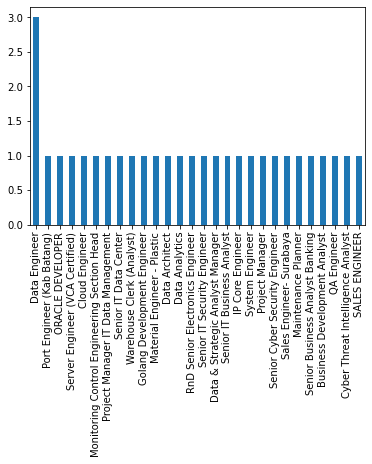

In [5]:
'''creat visualization from data frame'''
import seaborn as sns
import matplotlib.pyplot as plt
jobfunction = df1['Job Function'].value_counts()
jobfunction.plot.bar()
plt.show